# Sea Surface Temperature gradients

This Jupyter notebook reproduces Figure 2 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". Sea Surface Temperature gradients are defined as,

\begin{equation}
    \left|\nabla \mathrm{SST} \right| = \sqrt{ \left(\frac{\partial \mathrm{SST}}{\partial x}\right)^2 + \left(\frac{\partial \mathrm{SST}}{\partial y}\right)^2 }.
\end{equation}

Maps of SST in Figure 2 of this study correspond to the the time-mean SST:
\begin{equation}
    \overline{\left|\nabla \mathrm{SST} \right|}(x,y) = \overline{\sqrt{ \left(\frac{\partial \mathrm{SST}}{\partial x}\right)^2 + \left(\frac{\partial \mathrm{SST}}{\partial y}\right)^2 }}
\end{equation}

Then linear trends are computed with a modified Mann-Kendall test (See Methods of manusript).


In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from plot_utils import area, truncate_colormap, ccrs_land, add_patches

### Load $\left|\nabla \mathrm{SST} \right|$ timeseries dataset:

In [3]:
dataset_SST_grad = xr.open_dataset('../datasets/SST_grads_timeseries.nc')

In [4]:
print(dataset_SST_grad)

<xarray.Dataset>
Dimensions:               (lat: 180, lon: 360, time: 9346)
Coordinates:
  * time                  (time) datetime64[ns] 1993-06-01T12:00:00 ... 2019-...
  * lat                   (lat) float32 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
Data variables:
    SST_grad              (time, lat, lon) float32 ...
    SST_grad_small_scale  (time, lat, lon) float32 ...
    SST_grad_large_scale  (time, lat, lon) float32 ...
Attributes:
    title:         Sea Surface Temperature (SST), SST gradients, SST gradient...
    Description:   SST and SST gradients computed from OISST-NOAA. Eddy Kinet...
    Publication:   Dataset created for Martínez-Moreno, J. et. al. 2020: \n '...
    Author:        Josué Martínez-Moreno
    Contact:       josue.martinezmoreno@anu.edu.au
    Created date:  08/01/2021 15:37:18


In [5]:
grid_area = area(dataset_SST_grad.lat,dataset_SST_grad.lon)

Compute time-mean and load trends:

In [6]:
SST_grad = dataset_SST_grad.SST_grad

Slice data between 60°S - 60°N. Note that satellite observations resolve mesoscale eddies between 60°S - 60°N, the effective resolution outside these latitudes is larger than the Rossby radius of deformation.

In [7]:
SST_grad_slice = SST_grad.sel(lat=slice(-60,60))

Compute mean $\overline{\left|\nabla \mathrm{SST} \right|}(x,y)$ gradient.

In [8]:
mean_SST_grad = SST_grad_slice.mean('time')

In [9]:
print(mean_SST_grad)

<xarray.DataArray 'SST_grad' (lat: 120, lon: 360)>
array([[1.7349751e-06, 1.5545791e-06, 1.5759297e-06, ..., 1.7513805e-06,
        1.7452656e-06, 1.8468759e-06],
       [2.0341856e-06, 1.8250641e-06, 1.8689235e-06, ..., 1.9764880e-06,
        1.9436311e-06, 2.1103422e-06],
       [2.2400091e-06, 2.1291846e-06, 2.2701342e-06, ..., 2.2579561e-06,
        2.0717787e-06, 2.2755059e-06],
       ...,
       [6.0528764e-06, 6.1957535e-06, 5.8758851e-06, ..., 6.0669654e-06,
        4.3892633e-06, 6.5792647e-06],
       [4.9265623e-06, 4.6441601e-06, 5.4031757e-06, ..., 4.4985891e-06,
        5.2178693e-06, 6.6770126e-06],
       [5.2724859e-06, 4.6156933e-06, 6.0943562e-06, ..., 5.5588798e-06,
        6.4197898e-06, 8.6201690e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5


### Import trends

In [10]:
dataset_trends = xr.open_dataset('../datasets/SST_grads_trends.nc')

In [11]:
print(dataset_trends)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    trend    (lat, lon) float64 ...
    signif   (lat, lon) float64 ...
    p        (lat, lon) float64 ...
Attributes:
    title:         Sea Surface Temperature gradients trends
    Description:   SST gradients computed from OISST-NOAA. Then trends were c...
    Publication:   Dataset created for Martínez-Moreno, J. et. al. 2020: \n '...
    Author:        Josué Martínez-Moreno
    Contact:       josue.martinezmoreno@anu.edu.au
    Created date:  08/01/2021 15:44:02


Trends units are $^\circ C m^{-1} day^{-1}$, thus, here we convert to $\circ C m^{-1} decade^{-1}$ by multipling by 3650 days.

In [12]:
trends_per_decade = ( dataset_trends.trend * 10*365 )# Trends per day multiplied by 3650 days to report per decade.

Slice data between 60°S - 60°N.

In [13]:
trends = trends_per_decade.sel(lat=slice(-60,60)) 

In [14]:
print(trends)

<xarray.DataArray 'trend' (lat: 120, lon: 360)>
array([[ 5.90293499e-08,  6.65546814e-08,  1.55915613e-08, ...,
         6.61329531e-08,  3.13925291e-08,  2.00665473e-09],
       [ 6.00753180e-09,  2.08404237e-08, -1.49253555e-08, ...,
         1.70543946e-08,  5.32085466e-08,  1.36077997e-08],
       [-7.50705182e-08, -4.75735122e-08,  4.77303720e-09, ...,
        -3.83056557e-08,  2.64966930e-09, -3.38094053e-08],
       ...,
       [-4.64599376e-07, -3.94283090e-07, -3.66721703e-07, ...,
         3.30769707e-07, -2.58482377e-07, -3.10413145e-07],
       [-4.10319043e-07, -4.67976947e-07, -4.94804627e-07, ...,
        -2.30210084e-07, -1.28354604e-07, -1.06866415e-07],
       [-6.57787379e-07, -4.77622402e-07, -5.17233636e-07, ...,
        -1.96742184e-07,  7.32554453e-08,  2.52275612e-08]])
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5


### Plot figure 2 of manuscript

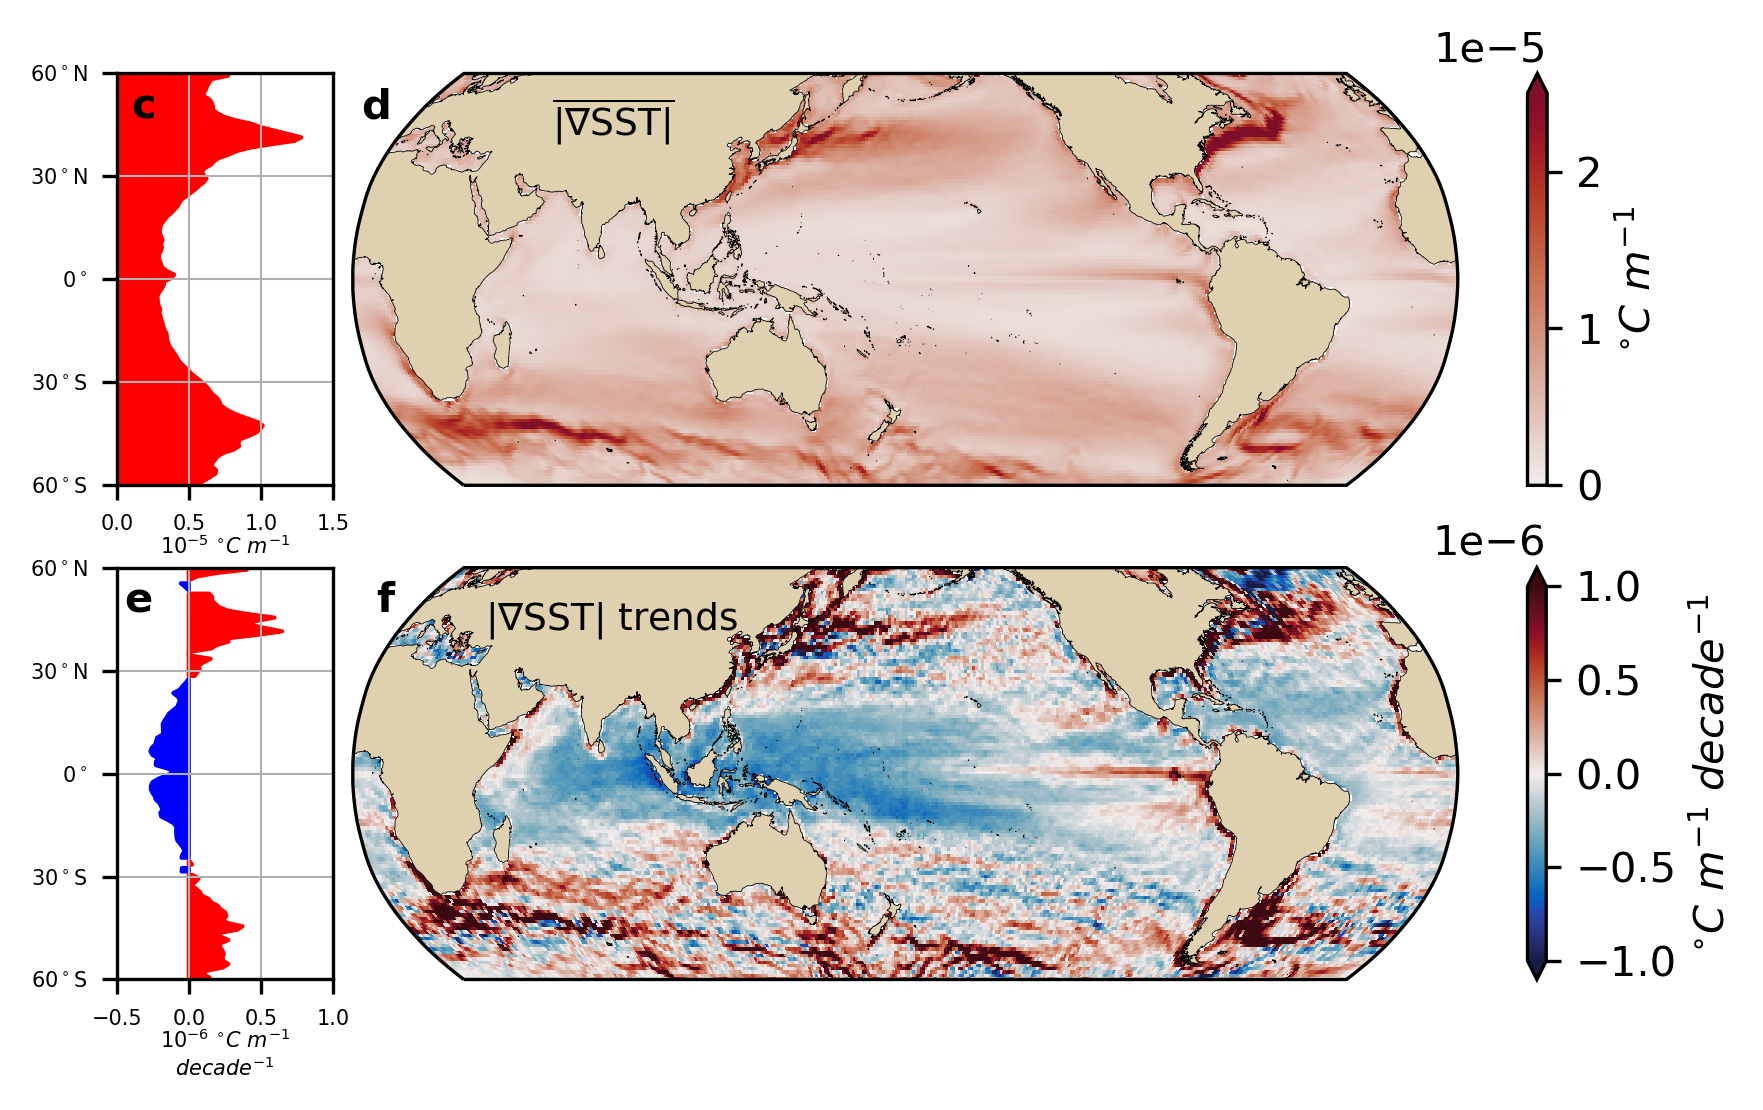

In [15]:
fig = plt.figure(dpi=300)

ax1 = fig.add_subplot(2, 1, 1, projection = ccrs.Robinson(central_longitude=180))

im = mean_SST_grad.plot(ax=ax1, transform = ccrs.PlateCarree(), add_colorbar=False,
              cmap = truncate_colormap(cm.cm.amp, 0, 0.8), vmin = 0, vmax = 2.5e-5)
ax1.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax1.add_feature(ccrs_land)
add_patches(ax1)

cb = plt.colorbar(im, orientation="vertical",extend='max')
cb.set_label(label="$^{\circ}C\ m^{-1}$")

ax_w1 = plt.axes([0, 0.537, 0.12, 0.343])

zonal_sum_tke=(mean_SST_grad.T).mean('lon')
zonal_sum_tke=zonal_sum_tke*1e5

pos=np.ma.masked_where(zonal_sum_tke<0, zonal_sum_tke)
ax_w1.fill_betweenx(zonal_sum_tke.lat, pos*0, pos, color='r')

neg=np.ma.masked_where(zonal_sum_tke>0, zonal_sum_tke)

ax_w1.fill_betweenx(zonal_sum_tke.lat, neg, neg*0, color='b')

ax_w1.set_ylim(-60,60)
ax_w1.set_xlim(0,1.5)
ax_w1.set_xlabel("$10^{-5}\ ^{\circ}C\ m^{-1}$",fontsize=5)
ax_w1.xaxis.set_label_coords(0.5, -0.12)
ax_w1.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w1.tick_params(axis='both', which='major', labelsize=5)
ax_w1.set_yticks(range(-60,61,30))
ax_w1.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w1.grid(linewidth=0.5)
ax_w1.text(0.1,47,'c',fontweight='bold')
ax_w1.text(1.7,47,'d',fontweight='bold')

###############################################################
###############################################################
###############################################################

ax2 = fig.add_subplot(2, 1, 2, projection = ccrs.Robinson(central_longitude=180))

im = trends.plot(transform=ccrs.PlateCarree(), add_colorbar=False,
              cmap=cm.cm.balance, vmin=-1e-6, vmax=1e-6,ax=ax2)
ax2.set_extent([0.1,359.99,-60, 60], crs=ccrs.PlateCarree())
ax2.add_feature(ccrs_land)
add_patches(ax2)

cb = plt.colorbar(im, orientation="vertical",extend='both')
cb.set_label(label="$^{\circ}C\ m^{-1}\ decade^{-1}$")


ax_w2 = plt.axes([0.0, 0.125, 0.12, 0.343])

increase_tke_gw=(trends.mean('lon'))*1e6

pos=np.ma.masked_where(increase_tke_gw<0, increase_tke_gw)
ax_w2.fill_betweenx(trends.lat, pos*0 , pos, color='r')

neg=np.ma.masked_where(increase_tke_gw>0, increase_tke_gw)

ax_w2.fill_betweenx(trends.lat, neg, neg*0, color='b')

ax_w2.set_ylim(-60,60)
ax_w2.set_xlim(-0.5,1.0)
ax_w2.set_xlabel("$10^{-6}\ ^{\circ}C\ m^{-1}$" "\n" r"$decade^{-1}$",fontsize=5)
ax_w2.xaxis.set_label_coords(0.5, -0.12)
ax_w2.xaxis.set_major_locator(plt.MaxNLocator(3))

ax_w2.tick_params(axis='both', which='major', labelsize=5)
ax_w2.set_yticks(range(-60,61,30))
ax_w2.set_yticklabels(['60$^\circ$S','30$^\circ$S','0$^\circ$','30$^\circ$N','60$^\circ$N'])
ax_w2.grid(linewidth=0.5)
ax_w2.text(-0.45,47,'e',fontweight='bold')
ax_w2.text(1.3,47,'f',fontweight='bold')

ax1.text(0.18,0.85,r'$\overline{|\nabla \mathrm{SST}|}$',fontsize=9,transform=ax1.transAxes);
ax2.text(0.12,0.85,r'$|\nabla \mathrm{SST}|$ trends',fontsize=9,transform=ax2.transAxes);

**Figure 2 Sea Surface Temperature (SST) trends, mean SST gradient magnitude, and SST gradient magnitude trends between 1993-2019.** (c) zonally averaged time-mean of
333 SST gradient magnitude; (d) map of time-mean of SST gradients magnitude; (e) zonally averaged SST gradient trend; (f) map of SST gradient trends (81.6% of global area is significant above 95% confidence level). In panel (d), solid contours show positive SST gradient trends and dashed contours show negative SST gradient trends (±0.5 × 10−6 ◦C m−1decade−1). Note that the spatial pattern of SST gradient maps is independent of the temporal extent of the SST gradient record used to compute SST gradient trends (Fig. S2).

*Note: Figure 2 a & b corresponds to the OISST trends from NOAA (See Methods).*